In [ ]:
# import libraries
from random import random
from random import randint
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.io import arff
from scipy.stats.stats import pearsonr
import warnings
warnings.filterwarnings('ignore')

<ipython-input-1-2b800194b71c>:18: DeprecationWarning: Please use `pearsonr` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  from scipy.stats.stats import pearsonr


In [ ]:
from google.colab import data_table
data_table.enable_dataframe_formatter()

from google.colab import data_table
data_table.disable_dataframe_formatter()

In [ ]:
from google.colab import data_table
from vega_datasets import data

data_table.enable_dataframe_formatter()

#data.df1()
#df1.corr()

In [ ]:
#def load_dataset():
df1 = pd.read_csv('r8-train-stemmed.csv',  header=0)
df1.head()
#COL_LIST = ["Language"]
#df1 = df.drop(COL_LIST,axis=1)
#df.columns()
#data = df1.values
#X, y = data[:, :-1], data[:, -1]
#data.df1()
#df1.head()

,text,edge,intent
0,champion product approv stock split champion p...,champion product approv stock split champion p...,earn
1,comput termin system cpml complet sale comput ...,comput termin system cpml complet sale comput ...,acq
2,cobanco inc cbco year net shr ct dlr net asset...,cobanco inc cbco year net shr ct dlr net asset...,earn
3,intern inc qtr jan oper shr loss two ct profit...,intern inc qtr jan oper shr loss two ct profit...,earn
4,brown forman inc bfd qtr net shr dlr ct net ml...,brown forman inc bfd qtr net shr dlr ct net ml...,earn


In [ ]:
from sklearn.compose import make_column_selector as selector

categorical_columns_selector = selector(dtype_include=object)
categorical_columns = categorical_columns_selector(df1)
categorical_columns

['text', 'edge', 'intent']

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

ISBSG = df1[['text', 'edge', 'intent']]

encoder = OrdinalEncoder()
nasa93_encoded = encoder.fit_transform(ISBSG)
nasa93_encoded

array([[8.830e+02, 8.830e+02, 2.000e+00],
       [1.098e+03, 1.098e+03, 0.000e+00],
       [1.023e+03, 1.023e+03, 2.000e+00],
       ...,
       [2.900e+02, 2.900e+02, 2.000e+00],
       [1.331e+03, 1.331e+03, 0.000e+00],
       [4.689e+03, 4.689e+03, 0.000e+00]])

In [ ]:
encoder.categories_

[array(['aar corp air qtr feb net shr ct ct net sale mln mln mth shr dlr ct net sale mln mln avg shr mln mln reuter',
        'aaron brother art mart inc aarn qtr net qtr end jan shr ct ct net rev mln mln year shr ct ct net rev mln mln reuter',
        'aaron spell product inc qtr net jan end shr ct ct net rev mln mln half shr ct ct net mln mln rev mln mln note current half net includ dlr charg reorgan reuter',
        ...,
        'zimbabw dollar devalu central bank zimbabw reserv bank nation central bank deni zimbabw dollar devalu bank governor kombo moyana told herald daili newspap unfortun and complet unfound specul that depreci zimbabw dollar occur had aggrav foreign exchang shortag februari and earli part march thi specul caus import bring forward payment and export delai long inward remitt export receipt result signific slowdown net foreign exchang inflow ad reuter',
        'zondervan corp zond qtr net shr profit nil profit ct net profit profit rev mln mln mth shr profit ct los

In [ ]:
data_encoded = encoder.fit_transform(ISBSG)
data_encoded[:5]

array([[8.830e+02, 8.830e+02, 2.000e+00],
       [1.098e+03, 1.098e+03, 0.000e+00],
       [1.023e+03, 1.023e+03, 2.000e+00],
       [2.365e+03, 2.365e+03, 2.000e+00],
       [6.870e+02, 6.870e+02, 2.000e+00]])

In [ ]:
columns_encoded = encoder.get_feature_names_out(ISBSG.columns)
ISBSG_data = pd.DataFrame(data_encoded, columns=columns_encoded)
#pd.DataFrame(data_encoded, columns=columns_encoded).head()
ISBSG_data.head()

,text,edge,intent
0,883.0,883.0,2.0
1,1098.0,1098.0,0.0
2,1023.0,1023.0,2.0
3,2365.0,2365.0,2.0
4,687.0,687.0,2.0


In [ ]:
ISBSG_data.corr()

,text,edge,intent
text,1.000000,1.000000,0.022508
edge,1.000000,1.000000,0.022508
intent,0.022508,0.022508,1.000000


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
def load_dataset():
#preprocessing
 features = ['text', 'edge', 'intent' ]
 max_corr_features = ['text', 'edge']

 X = ISBSG_data[max_corr_features]
 y = ISBSG_data['intent']

# normalize the target
 scaler = MinMaxScaler()
 y = y.values.reshape((len(y), 1))
 y = scaler.fit_transform(y)
 return X, y

In [ ]:
# evaluate a set of predictions
def evaluate_predictions(y_test, yhat):
	return mean_absolute_error(y_test, yhat)

# create a random set of predictions
def random_predictions(n_examples):
	return [random() for _ in range(n_examples)]

# modify the current set of predictions
def modify_predictions(current, n_changes=1):
	# copy current solution
	updated = current.copy()
	for i in range(n_changes):
		# select a point to change
		ix = randint(0, len(updated)-1)
		# flip the class label
		updated[ix] = random()
	return updated

# run a hill climb for a set of predictions
from sklearn.metrics import mean_squared_error, mean_absolute_error
def hill_climb_testset(X_test, y_test, max_iterations):
	scores = list()
	# generate the initial solution
	solution = random_predictions(X_test.shape[0])
	# evaluate the initial solution
	score = evaluate_predictions(y_test, solution)
	print('>%.3f' % score)
	# hill climb to a solution
	for i in range(max_iterations):
		# record scores
		scores.append(score)
		# stop once we achieve the best score
		if score == 0.0:
			break
		# generate new candidate
		candidate = modify_predictions(solution)
		# evaluate candidate
		value = evaluate_predictions(y_test, candidate)
		# check if it is as good or better
		if value <= score:
			solution, score = candidate, value
			print('>%d, score=%.3f' % (i, score))
	return solution, scores

(3307, 2) (1630, 2) (3307, 1) (1630, 1)
>0.360
>1, score=0.360
>4, score=0.360
>6, score=0.360
>8, score=0.360
>9, score=0.360
>12, score=0.359
>13, score=0.359
>16, score=0.359
>17, score=0.359
>18, score=0.359
>20, score=0.359
>21, score=0.358
>24, score=0.358
>27, score=0.358
>29, score=0.358
>33, score=0.358
>35, score=0.358
>39, score=0.358
>43, score=0.357
>44, score=0.357
>45, score=0.357
>46, score=0.357
>47, score=0.356
>48, score=0.356
>49, score=0.356
>51, score=0.356
>57, score=0.356
>60, score=0.356
>63, score=0.356
>65, score=0.356
>67, score=0.356
>68, score=0.355
>69, score=0.355
>70, score=0.355
>71, score=0.355
>73, score=0.354
>74, score=0.354
>78, score=0.354
>79, score=0.354
>80, score=0.354
>81, score=0.354
>85, score=0.354
>92, score=0.354
>94, score=0.354
>99, score=0.354
>100, score=0.353
>103, score=0.353
>107, score=0.353
>114, score=0.353
>115, score=0.353
>118, score=0.353
>119, score=0.353
>120, score=0.353
>124, score=0.352
>125, score=0.352
>127, score=0

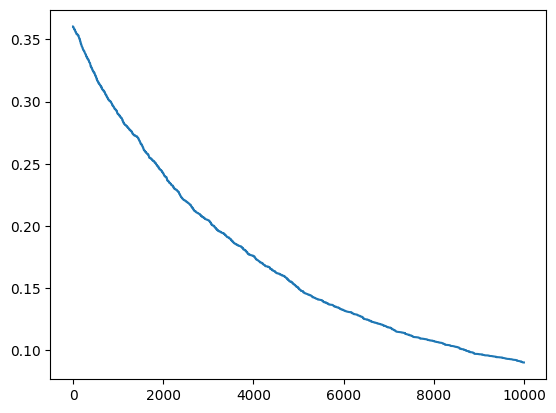

Mean Magnitude of Relative Error: 9.035141232614844
Median Magnitude of Relative Error: 6.098302488838894
R squared :  71.94317069524803
Mean square error:  1.8011062004960747
Root mean square error:  13.420529797649849
Mean magnitude of percentage error : 1.7940350742496518e+16


In [ ]:
# load the dataset
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import median_absolute_error
X, y = load_dataset()
#print(X.shape, y.shape)
# split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
# run hill climb
yhat, scores = hill_climb_testset(X_test, y_test, 10000)
# plot the scores vs iterations
pyplot.plot(scores)
pyplot.show()
#print('Test Accuracy: %.5f' % (scores))
from sklearn.metrics import r2_score
r2 = r2_score(y_test,yhat) * 100
relative_error = np.abs((y_test - yhat) / y_test)
mean_relative_error = mean_absolute_error(y_test, yhat)
median_relative_error = median_absolute_error(y_test, yhat)
#print("Relative Error:", relative_error)
print("Mean Magnitude of Relative Error:", mean_relative_error * 100)
print("Median Magnitude of Relative Error:", median_absolute_error(y_test, yhat) * 100)
print("R squared : " ,r2_score(y_test,yhat) * 100)
print("Mean square error: ", mean_squared_error(y_test, yhat) * 100)
print("Root mean square error: ", np.sqrt(mean_squared_error(y_test, yhat)) * 100)
#print("Mean Absolute error : ", mean_absolute_error(y_test, yhat) * 100)
print("Mean magnitude of percentage error :" , mean_absolute_percentage_error(y_test, yhat) * 100)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
neigh = KNeighborsRegressor(n_neighbors=3, weights='uniform')
neigh.fit(X_train, y_train)
predict = neigh.predict(X_test)
pyplot.show()
#print(neigh.score(X_test, y_test))
relative_error = np.abs((y_test - predict) / y_test)
mean_relative_error = mean_absolute_error(y_test, predict)
median_relative_error = median_absolute_error(y_test, predict)
#print("Relative Error:", relative_error)
print("Mean Magnitude of Relative Error:", mean_relative_error * 100)
print("Median Magnitude of Relative Error:", median_absolute_error(y_test, yhat) * 100)
print("R squared : " ,r2_score(y_test,predict) * 100)
print("Mean square error: ", mean_squared_error(y_test, predict) * 100)
print("Root mean square error: ", np.sqrt(mean_squared_error(y_test, predict)) * 100)
#print("Mean Absolute error : ", mean_absolute_error(y_test, predict) * 100)
print("Mean magnitude of percentage error :" , mean_absolute_percentage_error(y_test, predict) * 100)

Mean Magnitude of Relative Error: 15.801928133216474
Median Magnitude of Relative Error: 5.967220716751498
R squared :  18.537646351721893
Mean square error:  5.229470111152846
Root mean square error:  22.868034701637228
Mean magnitude of percentage error : 2.5958521953847496e+16


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
regressor = LinearRegression()
regressor.fit(X_train, y_train)
predict = regressor.predict(X_test)
#print(regressor.score(X_test, y_test))
relative_error = np.abs((y_test - predict) / y_test)
mean_relative_error = mean_absolute_error(y_test, predict)
median_relative_error = median_absolute_error(y_test, predict)
#print("Relative Error:", relative_error)
print("Mean Magnitude of Relative Error:", mean_relative_error * 100)
print("Median Magnitude of Relative Error:", median_absolute_error(y_test, yhat) * 100)
print("R squared : " ,r2_score(y_test,predict) * 100)
print("Mean square error: ", mean_squared_error(y_test, predict) * 100)
print("Root mean square error: ", np.sqrt(mean_squared_error(y_test, predict)) * 100)
#print("Mean Absolute error : ", mean_absolute_error(y_test, predict) * 100)
print("Mean magnitude of percentage error :" , mean_absolute_percentage_error(y_test, predict) * 100)

Mean Magnitude of Relative Error: 16.680260372940715
Median Magnitude of Relative Error: 5.967220716751498
R squared :  -0.20375128234575435
Mean square error:  6.43257282522056
Root mean square error:  25.3625172749484
Mean magnitude of percentage error : 3.471394564116449e+16


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
for i in np.arange(100,1100,100):
    regressor1 = RandomForestRegressor(n_estimators=i,max_features=5)
    regressor1.fit(X_train, y_train)
    predict = regressor1.predict(X_test)
    #print(regressor1.score(X_test, y_test))
    relative_error = np.abs((y_test - predict) / y_test)
    mean_relative_error = mean_absolute_error(y_test, predict)
    median_relative_error = median_absolute_error(y_test, predict)
    #print("Relative Error:", relative_error)
    print("Mean Magnitude of Relative Error:", mean_relative_error * 100)
    print("Median Magnitude of Relative Error:", median_absolute_error(y_test, yhat) * 100)
    print("R squared : " ,r2_score(y_test,predict) * 100)
    print("Mean square error: ", mean_squared_error(y_test, predict) * 100)
    print("Root mean square error: ", np.sqrt(mean_squared_error(y_test, predict)) * 100)
    #print("Mean Absolute error : ", mean_absolute_error(y_test, predict) * 100)
    print("Mean magnitude of percentage error :" , mean_absolute_percentage_error(y_test, predict) * 100)

Mean Magnitude of Relative Error: 15.137263052460245
Median Magnitude of Relative Error: 5.967220716751498
R squared :  16.927119405718884
Mean square error:  5.332857776131109
Root mean square error:  23.092981133086973
Mean magnitude of percentage error : 2.4653754279157644e+16
Mean Magnitude of Relative Error: 15.167055214723938
Median Magnitude of Relative Error: 5.967220716751498
R squared :  16.99472904866768
Mean square error:  5.328517579817203
Root mean square error:  23.08358200067139
Mean magnitude of percentage error : 2.478381002650369e+16
Mean Magnitude of Relative Error: 15.204756201048935
Median Magnitude of Relative Error: 5.967220716751498
R squared :  16.876517735410303
Mean square error:  5.336106146827538
Root mean square error:  23.10001330481768
Mean magnitude of percentage error : 2.477979717845715e+16
Mean Magnitude of Relative Error: 15.159205531906009
Median Magnitude of Relative Error: 5.967220716751498
R squared :  17.18730172237838
Mean square error:  5.31

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
parameters = {'kernel':('linear', 'rbf'), 'C':[1,2,3,4,5,6,7,8,9,10], 'gamma':('auto', 'scale')}

svr = SVR()
LinearSVC = GridSearchCV(svr, parameters, cv=3)
LinearSVC.fit(X_train, y_train)
predict = LinearSVC.predict(X_test)
#print(LinearSVC.score(X_test, y_test))
relative_error = np.abs((y_test - predict) / y_test)
mean_relative_error = mean_absolute_error(y_test, predict)
median_relative_error = median_absolute_error(y_test, predict)
#print("Relative Error:", relative_error)
print("Mean Magnitude of Relative Error:", mean_relative_error * 100)
print("Median Magnitude of Relative Error:", median_absolute_error(y_test, yhat) * 100)
print("R squared : " ,r2_score(y_test,predict) * 100)
print("Mean square error: ", mean_squared_error(y_test, predict) * 100)
print("Root mean square error: ", np.sqrt(mean_squared_error(y_test, predict)) * 100)
#print("Mean Absolute error : ", mean_absolute_error(y_test, predict) * 100)
print("Mean magnitude of percentage error :" , mean_absolute_percentage_error(y_test, predict) * 100)

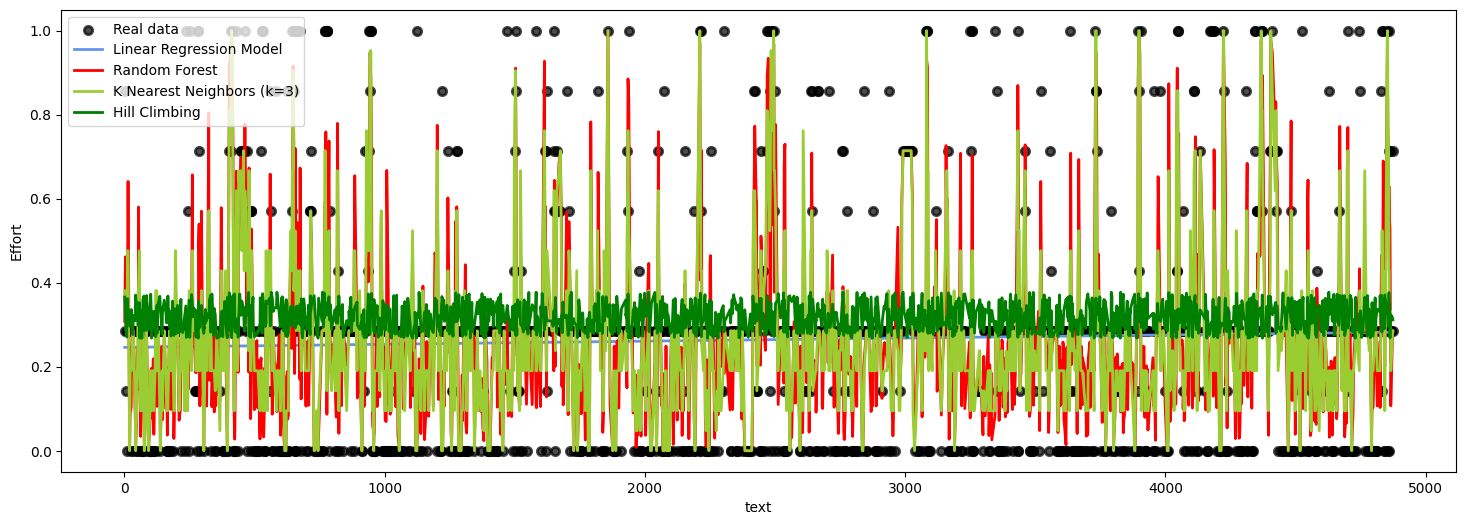

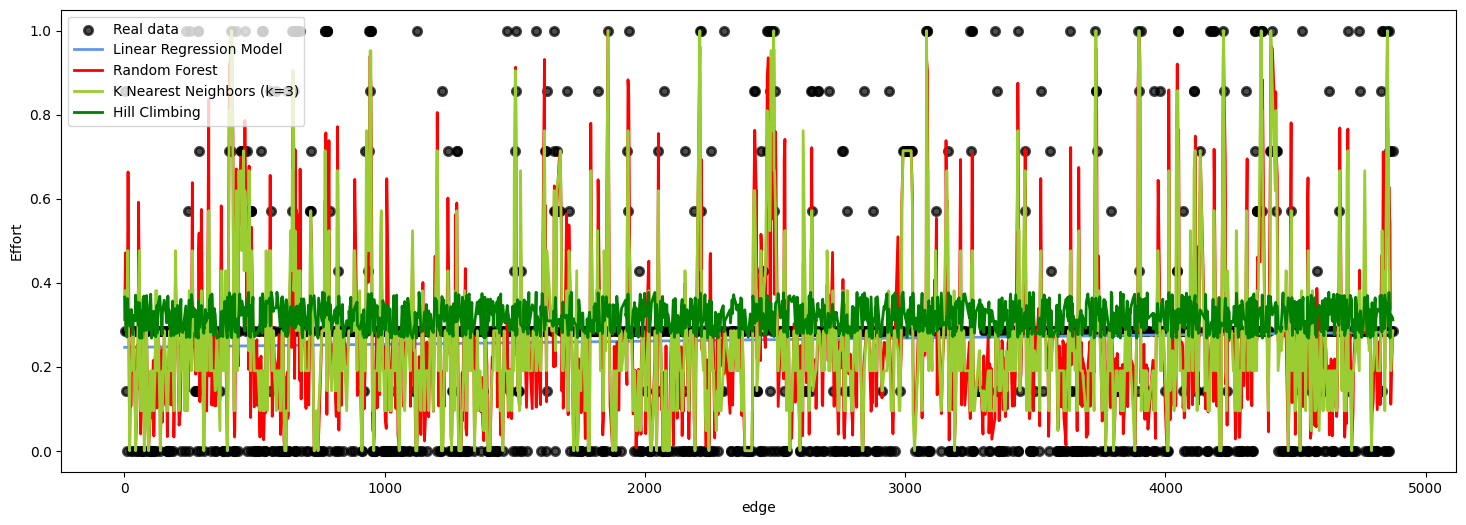

In [ ]:
for i, features in enumerate(X):
    plt.figure(figsize=(18,6))

    # Knn Regression Model
    xs, ys = zip(*sorted(zip(X_test[features], neigh.fit(X_train, y_train).predict(X_test))))

    # Linear Regression Model
    model1_xs, model1_ys = zip(*sorted(zip(X_test[features], regressor.fit(X_train, y_train).predict(X_test))))

    # Random forest
    model2_xs, model2_ys = zip(*sorted(zip(X_test[features], regressor1.fit(X_train, y_train).predict(X_test))))

    # Support Vector Machine
    #svc_model_xs, svc_model_ys = zip(*sorted(zip(X_test[features], LinearSVC.fit(X_train, y_train).predict(X_test))))

    # Hill Climbing
    model3_xs, model3_ys = zip(*sorted(zip(X_test[features], scores)))

    plt.scatter(X_test[features], y_test, label='Real data', lw=2,alpha= 0.7, c='k' )
    plt.plot(model1_xs, model1_ys , lw=2, label='Linear Regression Model', c='cornflowerblue')
    plt.plot(model2_xs, model2_ys , lw=2, label='Random Forest', c='Red')
    plt.plot(xs, ys , lw=2,label='K Nearest Neighbors (k=3)', c='yellowgreen')
    plt.plot(model3_xs, model3_ys , lw=2,label='Hill Climbing', c='Green')
    #plt.plot(svc_model_xs, svc_model_ys , lw=2,label='SVM', c='Blue')

    plt.xlabel(features)
    plt.ylabel('Effort')
    plt.legend()
    plt.show()